# Parkinson's Disease Progression Prediction
### Project - SI 618: Data Manipulation and Analysis

Authors
1. Nowrin Mohamed - nowrin@umich.edu
2. Prithvijit Dasgupta - prithvid@umich.edu
3. Sachin Salim - sachinks@umich.edu

Kaggle link: https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction/overview

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
supplemental_clinical_data = pd.read_csv('data/supplemental_clinical_data.csv')
peptides_data = pd.read_csv('data/train_peptides.csv') 
clinical_data = pd.read_csv('data/train_clinical_data.csv') 
proteins_data = pd.read_csv('data/train_proteins.csv')

## Descriptive Analysis

### Proteins (Sachin)

In [29]:
display(proteins_data.head(2))
display(proteins_data.info())

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


None

In [30]:
print(f'records: {len(proteins_data)}')

unique_visits = len(proteins_data['visit_id'].unique())
print(f'Unique visits: {unique_visits}')

unique_proteins = len(proteins_data['UniProt'].unique())
print(f'Unique proteins: {unique_proteins}')

unique_patients = len(proteins_data['patient_id'].unique())
print(f'Unique patients: {unique_patients}')

visit_min = proteins_data['visit_month'].min()
visit_max = proteins_data['visit_month'].max()
print(f'Visit month range: ({visit_min}, {visit_max})')

records: 232741
Unique visits: 1113
Unique proteins: 227
Unique patients: 248
Visit month range: (0, 108)


In [40]:
proteins_data['visit_month'].value_counts().sort_index().to_frame().T

,0,3,6,12,18,24,30,36,48,54,60,72,84,96,108
visit_month,40587,641,25991,37467,1657,36225,216,31156,28838,418,17572,4407,6288,423,855


**Idea**
Make a 2D-matrix with 
* axis 0 -> visit_id
* axis 1 -> proteins
* values -> NPX

OR

Make a 3D-matrix with 
* axis 0 -> patient_id
* axis 1 -> month
* axis 2 -> proteins
* values -> NPX

In [36]:
proteins_data.head(1)

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3


2D-matrix with 
* axis 0 -> visit_id
* axis 1 -> proteins
* values -> NPX

In [38]:
proteins_features = proteins_data.pivot(index='visit_id', columns='UniProt', values='NPX')
proteins_features

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.10,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400290.0,24240.10,NaN,16943.50,6303.17,77493.6,46435.3,254247.0,138910.0,...,NaN,25690.60,NaN,6859.82,19106.7,121161.0,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.7,234094.0,82410.4,19183.7,17804.10,12277.00
942_24,NaN,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.6,256654.0,76931.9,19168.2,19215.90,14625.60


Another way to make the above matrix, but with multi-indices (so as to preserve the relationship between rows (same patient))

In [53]:
proteins_features_1 = proteins_data.pivot(index=['patient_id', 'visit_month'], columns='UniProt', values='NPX')
proteins_features_1

UniProt                  O00391     O00533   O00584   O14498    O14773  \
patient_id visit_month                                                   
55         0            11254.3   732430.0  39585.8  41526.9  31238.00   
           6            13163.6   630465.0  35220.8  41295.0  26219.90   
           12           15257.6   815083.0  41650.9  39763.3  30703.60   
           36           13530.8   753832.0  43048.9  43503.6  33577.60   
942        6            11218.7   399518.0  20581.0  31290.9   6173.58   
...                         ...        ...      ...      ...       ...   
64674      84               NaN   190487.0  24907.9  18543.1  10124.90   
65043      0            13472.4   927954.0  42661.5  43663.2  20071.30   
           12           14134.9   984651.0  28990.8  42440.9  25357.40   
           24           14659.5  1062020.0  46440.4  38293.0  21971.80   
           48           10589.6   902434.0  44890.8  38771.5  20188.30   

UniProt                  O14791    O15240    O15394    O43505    O60888  ...  \
patient_id visit_month                                                   ...   
55         0            4202.71  177775.0   62898.2  333376.0  166850.0  ...   
           6            4416.42  165638.0   62567.5  277833.0  170345.0  ...   
           12           4343.60  151073.0   66963.1  332401.0  151194.0  ...   
           36           5367.06  101056.0   67588.6  317490.0  122902.0  ...   
942        6            2564.37  160526.0   43423.1  165524.0   85272.7  ...   
...                         ...       ...       ...       ...       ...  ...   
64674      84           2308.71   62095.4   29248.7   87693.0   96801.4  ...   
65043      0            3278.88  266339.0  117884.0  382666.0  246063.0  ...   
           12           3267.66  270575.0  108246.0  321941.0  217877.0  ...   
           24           3990.34  221358.0  117204.0  348672.0  175961.0  ...   
           48           3137.07  203487.0   85782.0  160728.0  176787.0  ...   

UniProt                   Q9HDC9    Q9NQ79    Q9NYU2   Q9UBR2   Q9UBX5  \
patient_id visit_month                                                   
55         0            365475.0  35528.00   97005.6  23122.5  60912.6   
           6            405676.0  30332.60  109174.0  23499.8  51655.8   
           12           303953.0  43026.20  114921.0  21860.1  61598.2   
           36           303597.0  48188.40  109794.0  23930.6  70223.5   
942        6            253373.0  27431.80   93796.7  17450.9  21299.1   
...                          ...       ...       ...      ...      ...   
64674      84           260021.0   7139.93  104277.0  10500.0  21944.2   
65043      0            186414.0  25897.80       NaN  21480.7  57364.0   
           12           301343.0  22343.40  105626.0  20500.8  54011.2   
           24           300439.0  52143.60  139291.0  19449.2  66569.9   
           48           223136.0  21659.90  116470.0  14073.3  48796.4   

UniProt                   Q9UHG2   Q9UKV8   Q9UNU6   Q9Y646   Q9Y6R7  
patient_id visit_month                                                
55         0            408698.0      NaN  29758.8  23833.7  18953.5  
           6            369870.0      NaN  22935.2  17722.5  16642.7  
           12           318553.0  65762.6  29193.4  28536.1  19290.9  
           36           377550.0  74976.1  31732.6  22186.5  21717.1  
942        6            306621.0  82335.5  24018.7  18939.5  15251.2  
...                          ...      ...      ...      ...      ...  
64674      84           136725.0  62217.5      NaN  10287.7  13848.2  
65043      0            416142.0  37584.6      NaN  28346.5  35617.5  
           12           380072.0  40588.9      NaN  17035.7  37064.2  
           24           300948.0  36150.4      NaN  21286.3  39587.9  
           48           320821.0  39046.7      NaN  20198.8  39535.0  

[1113 rows x 227 columns]

### Variance
Find average variance across patients and across months. This tells the importance of filling nan with average of patient or avg of month. Eg, if average variance across patients is very less, that means the patient determine the protein npx levels and thus nans can be filled by each patient's average.

In [70]:
proteins_features_1.query('patient_id == 2660')

UniProt                  O00391    O00533   O00584   O14498    O14773  \
patient_id visit_month                                                  
2660       0                NaN  579829.0  28259.8  29883.2  19134.10   
           6                NaN  673129.0  32040.8  36289.5  22368.30   
           12           15516.2  779498.0  35938.3  49586.5  29522.50   
           24               NaN  743746.0  32525.6  32157.8   4674.86   
           48               NaN  771095.0  33814.9  47828.2  29928.50   

UniProt                  O14791    O15240   O15394    O43505    O60888  ...  \
patient_id visit_month                                                  ...   
2660       0            1884.61  134409.0  70664.8  213295.0  229999.0  ...   
           6            2066.33  166920.0  84632.2  237007.0  285073.0  ...   
           12           2420.14  267756.0  73046.1  349190.0  217461.0  ...   
           24           1663.35  188875.0  85157.2  231779.0  295610.0  ...   
           48           2087.76  215996.0  81565.7  267789.0  259278.0  ...   

UniProt                   Q9HDC9   Q9NQ79    Q9NYU2   Q9UBR2   Q9UBX5  \
patient_id visit_month                                                  
2660       0            224909.0  32224.2  127529.0  14148.6  26387.0   
           6            262758.0  36865.9  130364.0  17123.7  37659.9   
           12           444934.0  62133.5  167043.0      NaN  36361.1   
           24           330574.0  35736.2  125303.0  16774.0  31730.0   
           48           208432.0  40533.1  132293.0  13707.8  39310.7   

UniProt                   Q9UHG2   Q9UKV8   Q9UNU6   Q9Y646   Q9Y6R7  
patient_id visit_month                                                
2660       0            294153.0  55047.2  17880.5  25630.0  17990.9  
           6            350459.0  54896.2  20326.5  25334.7  24419.4  
           12           453013.0  81213.7  29266.6  25080.2  24100.1  
           24           311041.0  57694.0  17076.3  28899.9  15679.4  
           48           427263.0  74070.9  21556.8  25000.7  24798.6  

[5 rows x 227 columns]

In [73]:
proteins_features_1.groupby('patient_id').std().mean()

UniProt
O00391     1800.924413
O00533    94987.309047
O00584     5752.822347
O14498     4618.302561
O14773     3447.624632
              ...     
Q9UHG2    52341.025249
Q9UKV8    11687.821092
Q9UNU6     3912.007990
Q9Y646     3301.722211
Q9Y6R7     4750.504922
Length: 227, dtype: float64

In [74]:
proteins_features_1.groupby('visit_month').std().mean()

UniProt
O00391      2461.451909
O00533    274890.739707
O00584      9617.879798
O14498      9099.775126
O14773      8241.988260
              ...      
Q9UHG2    112378.494719
Q9UKV8     26955.932069
Q9UNU6      6196.737253
Q9Y646      5950.244038
Q9Y6R7      9010.426818
Length: 227, dtype: float64

In [77]:
patient_var = proteins_features_1.groupby('patient_id').std().mean()
month_var = proteins_features_1.groupby('visit_month').std().mean()
print((month_var/patient_var).mean())

1.8177160614065204


Since the above value is greater than 1, it means patient-id tells more about the npx value

### Filling nan

In [52]:
print("Total nan values: ", proteins_features.isna().sum().sum())
proteins_features.isna().sum().sort_values(ascending=False).to_frame().T

Total nan values:  19910


UniProt,Q99829,Q99832,Q562R1,P01780,Q6UX71,O75326,P06310,P19827,P36980,P02655,...,P01876,P02751,P02749,P23142,P41222,P01011,P02649,P02647,Q12805,P01042
0,624,507,497,459,452,419,418,415,409,404,...,0,0,0,0,0,0,0,0,0,0


In [57]:
proteins_features_1.groupby('patient_id').mean()

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
patient_id,,,,,,,,,,,,,,,,,,,,,
55,13301.575,732952.500000,39876.600000,41522.200000,30434.775000,4582.4475,148885.500000,65004.350000,315275.000000,152822.750000,...,344675.250000,39268.800000,107723.650000,23103.250,61097.525000,368667.750000,70369.350000,28405.000000,23069.700000,19151.050000
942,9867.940,341229.500000,20957.500000,23951.300000,15977.670000,1973.1200,111096.825000,36851.675000,182781.250000,92462.575000,...,169394.325000,30001.200000,101373.075000,15345.200,20746.575000,257417.500000,84645.925000,20872.875000,17512.325000,14643.075000
1517,10969.500,552938.000000,31469.900000,24136.833333,22759.025000,3018.9175,119928.025000,57152.975000,203169.250000,155771.425000,...,266538.750000,37667.350000,NaN,16583.075,33555.300000,228064.500000,61940.733333,22460.175000,19620.150000,21091.825000
1923,21361.800,793890.666667,30228.433333,47823.450000,14090.666667,NaN,257554.333333,70094.633333,340470.666667,243465.333333,...,107803.333333,58747.433333,139185.000000,16594.700,67328.366667,510925.000000,133290.766667,29150.500000,25363.233333,24934.500000
2660,15516.200,709459.400000,32515.880000,39149.040000,21125.652000,2024.4380,194791.200000,79013.200000,259812.000000,257484.200000,...,294321.400000,41498.580000,136506.400000,15438.525,34289.740000,367185.800000,64584.400000,21221.340000,25989.100000,21397.680000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63875,11980.700,636355.400000,31819.700000,27861.620000,22741.200000,2692.6900,125521.800000,62693.600000,213756.400000,166549.000000,...,201022.000000,44946.260000,125133.400000,16041.820,35570.280000,267431.400000,67820.640000,22623.660000,20569.100000,20656.180000
63889,NaN,413628.166667,26970.516667,NaN,14425.683333,NaN,113897.500000,24825.146667,137974.000000,77529.116667,...,42948.500000,15727.364000,123276.750000,15042.800,42873.766667,217128.333333,64767.440000,18046.666667,17473.150000,NaN
64669,10806.500,430561.800000,27622.380000,25122.560000,14849.120000,2918.0800,83104.260000,41662.000000,180097.200000,139964.400000,...,261092.200000,23707.800000,108763.740000,15342.240,34192.580000,172804.800000,64995.300000,20445.400000,18041.100000,22972.920000


In [ ]:
sal['BasePay'] = sal['BasePay'].fillna(sal.groupby('JobTitle')['BasePay'].transform('mean'))

### Data cleaning
1. For the month 30, only one patient is present (50611)
2. For the month 54, only two patients are present (207, 211)

Should we remove the above data?

In [35]:
proteins_data.query('visit_month == 54')['patient_id'].value_counts()

4161    211
8344    207
Name: patient_id, dtype: int64

TODO: What to do about missing proteins across visits

In [7]:
proteins_data.pivot_table(
    index='visit_id',
    values='UniProt',
    aggfunc=np.count_nonzero).describe()


,UniProt
count,1113.000000
mean,209.111411
std,12.033458
min,37.000000
25%,206.000000
50%,212.000000
75%,216.000000
max,224.000000


<AxesSubplot: ylabel='Frequency'>

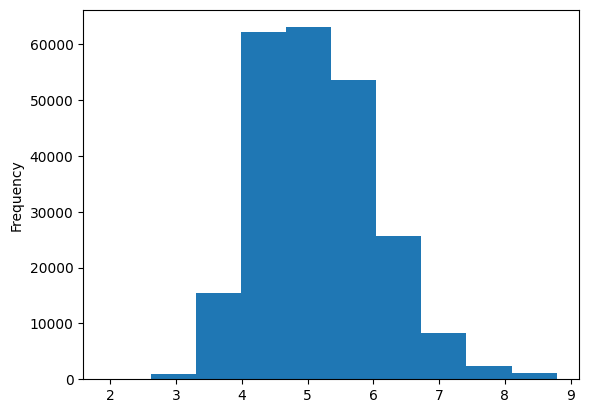

In [15]:
np.log10(proteins_data['NPX']).plot.hist()

In [17]:
protein_npx_mean = proteins_data.pivot_table(
    index='UniProt',
    values='NPX',
    aggfunc=np.median)
protein_npx_mean


,NPX
UniProt,
O00391,11546.40
O00533,483442.50
O00584,26529.70
O14498,26624.00
O14773,17399.60
...,...
Q9UHG2,214051.00
Q9UKV8,67571.70
Q9UNU6,18977.00


In [12]:
np.log10(protein_npx_mean).describe()

,NPX
count,227.000000
mean,5.130121
std,0.881661
min,3.348303
25%,4.445856
50%,5.003397
75%,5.731550
max,8.491597


<AxesSubplot: ylabel='Frequency'>

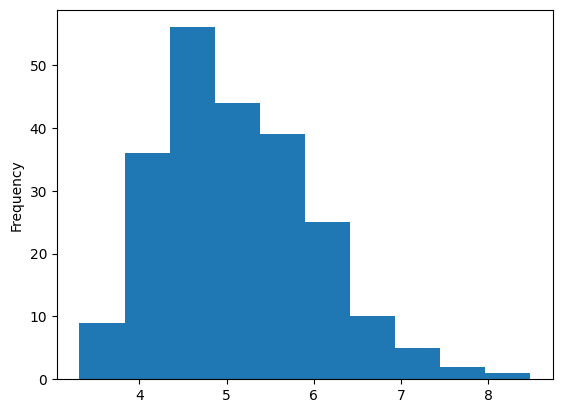

In [18]:
np.log10(protein_npx_mean['NPX']).plot.hist()

In [28]:
proteins_data['UniProt'].value_counts().head(10)

P01024    1113
P05090    1113
P01011    1113
P01023    1113
Q92520    1113
P01042    1113
P23142    1113
P02790    1113
Q9UHG2    1113
P01834    1113
Name: UniProt, dtype: int64

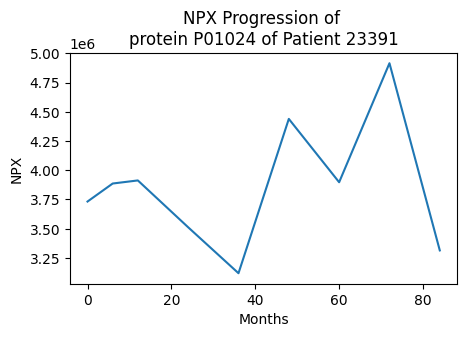

In [51]:
npx_progression = proteins_data.query('patient_id == 23391 & UniProt == "P01024"')
plt.figure(figsize=(5,3))
plt.plot(npx_progression['visit_month'], npx_progression['NPX'])
plt.xlabel("Months")
plt.ylabel("NPX")
plt.title("NPX Progression of \nprotein P01024 of Patient 23391")
plt.show()

In [11]:
proteins_data['NPX'].describe()

count    2.327410e+05
mean     2.712077e+06
std      2.224155e+07
min      8.460820e+01
25%      2.946440e+04
50%      1.135560e+05
75%      5.638940e+05
max      6.138510e+08
Name: NPX, dtype: float64

<AxesSubplot: ylabel='Frequency'>

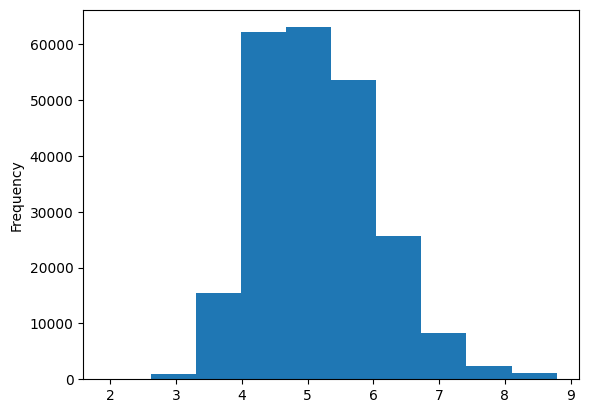

### Peptides (Nowrin)

In [14]:
print(f'records: {len(peptides_data)}')
peptides_data.head()

records: 981834


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [15]:
unique_peptides = len(peptides_data['Peptide'].unique())
print(f'{unique_peptides} unique peptides')

968 unique peptides


### Clinical data (Prithvi)

In [16]:
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2615 non-null   int64  
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 163.6+ KB


In [17]:
print(f'records: {len(clinical_data)}')
clinical_data.head()

records: 2615


,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,6,NaN,NaN
1,55_3,55,3,10.0,7.0,19,NaN,NaN
2,55_6,55,6,8.0,10.0,58,NaN,NaN
3,55_9,55,9,8.0,9.0,17,0.0,On
4,55_12,55,12,10.0,10.0,2,0.0,On


In [18]:
clinical_data['upd23b_clinical_state_on_medication'].value_counts(dropna = False)

NaN    1327
On      775
Off     513
Name: upd23b_clinical_state_on_medication, dtype: int64

In [19]:
clinical_data.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.000000,2615.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.742442,20.213384,1.861763
std,18535.758700,25.199053,5.525678,6.321699,20.760290,3.022112
min,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.000000,4.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.000000,9.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.000000,21.000000,3.000000
max,65043.000000,108.000000,33.000000,40.000000,58.000000,20.000000


In [20]:
clinical_data['updrs_cum'] = clinical_data['updrs_1'] + clinical_data['updrs_2'] + clinical_data['updrs_3'] + clinical_data['updrs_4']

<AxesSubplot: ylabel='Frequency'>

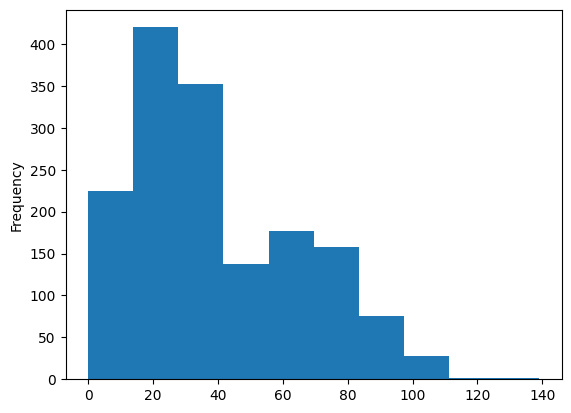

In [21]:
clinical_data['updrs_cum'].plot.hist()